In [2]:
import json
import os
import pandas as pd
from collections import Counter

In [7]:
compiled_path = "relevants/all/compiled_data.json"
compiled_df_path = "relevants/all/compiled_data.csv"

with open(compiled_path, "r") as f:
    compiled_data = json.load(f)

In [8]:
cdf = pd.DataFrame(compiled_data)

cdf.to_csv(compiled_df_path, index=False)


In [37]:
cdf.isna().sum()

filename    0
question    0
options     0
answer      0
category    0
id          0
dtype: int64

In [38]:
cdf.describe()

,filename,question,options,answer,category,id
count,7042,7042,7042,7042,7042,7042
unique,6167,6418,6806,4012,9,7042
top,CHITTRON_757.png,ছবিতে কি দেখা যাচ্ছে?,"[সকাল, দুপুর, সন্ধ্যা, রাত]",ধান,Social Life,P4BN2309
freq,3,19,10,67,2537,1


In [39]:
cdf['category'].value_counts()

category
Social Life           2537
Nature                1877
Arts & History         715
Food                   587
Incidents              405
Cultural Festivals     322
Religious Events       206
Sports                 198
Clothing & Fashion     195
Name: count, dtype: int64

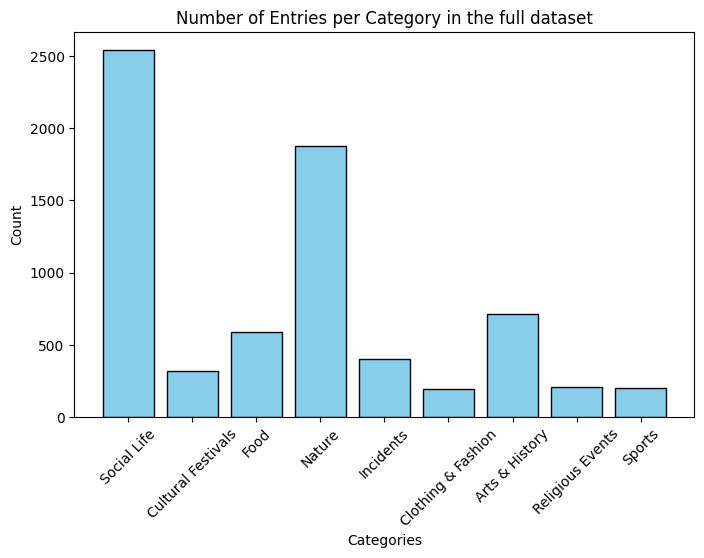

In [9]:
import matplotlib.pyplot as plt



category_counts = Counter(item['category'] for item in compiled_data)

# Extract labels and values
categories = list(category_counts.keys())
counts = list(category_counts.values())

# Plot the bar chart
plt.figure(figsize=(8, 5))
plt.bar(categories, counts, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel("Categories")
plt.ylabel("Count")
plt.title("Number of Entries per Category in the full dataset")
plt.xticks(rotation=45)  

parts = compiled_path.split('/')
parts[-1] = f"{parts[-2]}_category_count.png"
new_file_path = "/".join(parts)

plt.savefig(new_file_path, bbox_inches='tight', dpi=300)
# Show the plot
plt.show()

### Test data creation

In [17]:
df_sampled = cdf.groupby("category").apply(lambda x: x.sample(n=min(60, len(x)), random_state=42)).reset_index(drop=True)

/tmp/ipykernel_83595/393420280.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_sampled = cdf.groupby("category").apply(lambda x: x.sample(n=min(60, len(x)), random_state=42)).reset_index(drop=True)


In [18]:
df_sampled['category'].value_counts()

category
Arts & History        60
Clothing & Fashion    60
Cultural Festivals    60
Food                  60
Incidents             60
Nature                60
Religious Events      60
Social Life           60
Sports                60
Name: count, dtype: int64

In [19]:
df_sampled.tail(10)

,filename,question,options,answer,category,id
530,BNATURE_1268.jpg,ছবিটি কোন খেলা এবং কোন দেশের প্রতিনিধিত্ব করে?,"[ফুটবল, ভারত, ক্রিকেট, বাংলাদেশ, হকি, পাকিস্তা...","ক্রিকেট, বাংলাদেশ",Sports,P4BN1268
531,BNATURE_6725.jpg,ছেলে দুটি কি খেলা করছে?,"[বেয়ারিং গাড়ি, ক্রিকেট, ফুটবল, হাডুডু]",বেয়ারিং গাড়ি,Sports,P7BN6725
532,BNATURE_7947.jpg,ছবিতে থাকা বাচ্চারা কি করছে?,"[ফুটবল খেলছে, কাজ করছে, ছবি তুলছে, সমুদ্রে সাঁ...",ফুটবল খেলছে,Sports,P7BN7947
533,BNATURE_2056.jpg,ছবিতে কিছু ছেলে ক্রিকেট খেলছে। বাংলাদেশের গ্রা...,"[খেলা কেবল শারীরিকভাবে ফিট রাখতে সাহায্য করে, ...",খেলাধুলার মাধ্যমে একে অপরের মধ্যে সমঝোতা এবং স...,Sports,P4BN2056
534,CHITTRON_1879.png,"এই ছবিতে যে খেলাটি শিশুদের খেলতে দেখা যাচ্ছে, ...","[কাবাডি, ফুটবল, ক্রিকেট, কাদা খেলা]",কাদা খেলা,Sports,P8CH1879
535,BNATURE_3705.jpg,শিশুরা মাঠে কী খেলছে?,"[ক্রিকেট, ফুটবল, হকি, ভলিবল]",ক্রিকেট,Sports,P5BN3705
536,CHITTRON_1922.png,"এই ছবিতে যে খেলা দেখা যাচ্ছে, সেটি বাংলাদেশের ...","[ক্রিকেট, হকি, কাবাডি, ফুটবল]",ক্রিকেট,Sports,P8CH1922
537,CHITTRON_7913.png,শিশুরা কি খেলছে?,"[গোল্লাছুট, চু কিত কিত, বৌ চি, কাবাডি]",চু কিত কিত,Sports,F3CH7913
538,CHITTRON_4072.png,বাংলাদেশের কোন জনপ্রিয় খেলাটি নির্দেশ করা হচ্ছে?,"[ক্রিকেট, ফুটবল, কাবাডি, হকি]",ক্রিকেট,Sports,P1CH4072
539,CHITTRON_4211.png,সৈকতে বাংলাদেশের কোন জনপ্রিয় খেলাটি খেলতে দেখা...,"[ক্রিকেট, ফুটবল, কাবাডি, দাবা]",ক্রিকেট,Sports,P1CH4211


In [20]:
df_sampled.to_json("relevants/all/test_data.json", orient="records", force_ascii=False, indent=4)

In [21]:
df_sampled.to_csv("relevants/all/test_data.csv", index=False)

In [22]:
files_to_test = set(df_sampled['filename'])
len(files_to_test)

529